## Salifort Motors project
 
### Provide data-driven suggestions for HR

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

### **What’s likely to make the employee leave the company?**

### Deliverables

Analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team.

- Model evaluation
- Data visualizations
- Ethical considerations
- Resources
- One-page summary of this project

### HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [173]:
# Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option("display.max_columns", None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

In [174]:
# Load dataset
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows
df0.head(10)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   
5                0.41             0.50               2                   153   
6                0.10             0.77               6                   247   
7                0.92             0.85               5                   259   
8                0.89             1.00               5                   224   
9                0.42             0.53               2                   142   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   
5                   3              0     1                      0      sales   
6                   4              0     1                      0      sales   
7                   5              0     1                      0      sales   
8                   5              0     1                      0      sales   
9                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low  
5     low  
6     low  
7     low  
8     low  
9     low

### EDA

In [175]:
# Basic information
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [176]:
# Descriptive statistics
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [177]:
# Rename columns names to standardize

# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [178]:
# Rename columns
df0 = df0.rename(columns={"average_montly_hours": "average_monthly_hours",
                          "time_spend_company": "tenure",
                          "Work_accident": "work_accident",
                          "Department": "department"})
# Display column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [179]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values

In [180]:
# Check for duplicates
df0.duplicated().sum()

3008

3,008 rows contain duplicate values. That is 20% of the data

In [181]:
# Inspect some rows containing duplicates
df0[df0.duplicated()].head(10)

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
1516                 0.40             0.50               2   
1616                 0.37             0.46               2   
1696                 0.39             0.56               2   
1833                 0.10             0.85               6   
12000                0.38             0.53               2   

       average_monthly_hours  tenure  work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
1516                     127       3              0     1   
1616                     156       3              0     1   
1696                     160       3              0     1   
1833                     266       4              0     1   
12000                    157       3              0     1   

       promotion_last_5years  department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
1516                       0          IT     low  
1616                       0       sales     low  
1696                       0       sales     low  
1833                       0       sales     low  
12000                      0       sales     low

Since there are 10 columns with some of them containing continous variables, it seems unlikely for the duplicate observations to be legitimate.

In [182]:
# Drop duplicates, save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep="first")

df1.head(10)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   
6                0.10             0.77               6                    247   
7                0.92             0.85               5                    259   
8                0.89             1.00               5                    224   
9                0.42             0.53               2                    142   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low  
6       4              0     1                      0      sales     low  
7       5              0     1                      0      sales     low  
8       5              0     1                      0      sales     low  
9       3              0     1                      0      sales     low

### Check for outliers

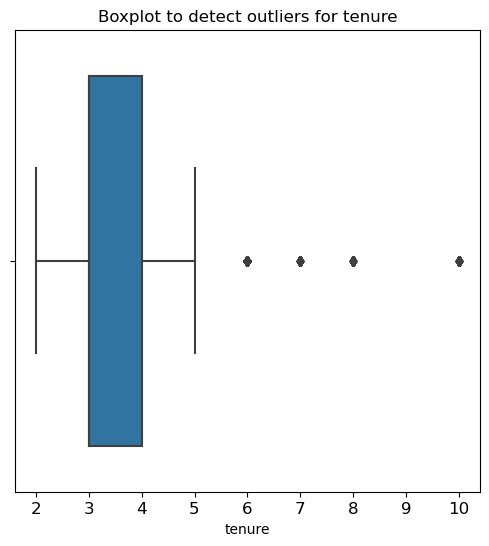

In [183]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title("Boxplot to detect outliers for tenure", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1["tenure"])
plt.show()

Investigate how many rows in contain outliers in the `tenure` column

In [184]:
# Determine the number of rows containing outliers

# 25th percentile
percentile25 = df1["tenure"].quantile(0.25)

# 75th percentile
percentile75 = df1["tenure"].quantile(0.75)

# IQR
iqr = percentile75 - percentile25

# upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

# subset of data containing outliers
outliers = df1[(df1["tenure"] > upper_limit) | (df1["tenure"] < lower_limit)]

# count rows
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

upper limit: 5.5
lower limit: 1.5
Number of rows in the data containing outliers in `tenure`: 824


In [185]:
# Number of people who left vs. stayed
print(df1["left"].value_counts())
print()

# Percentage of people who left vs. stayed
print(df1["left"].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

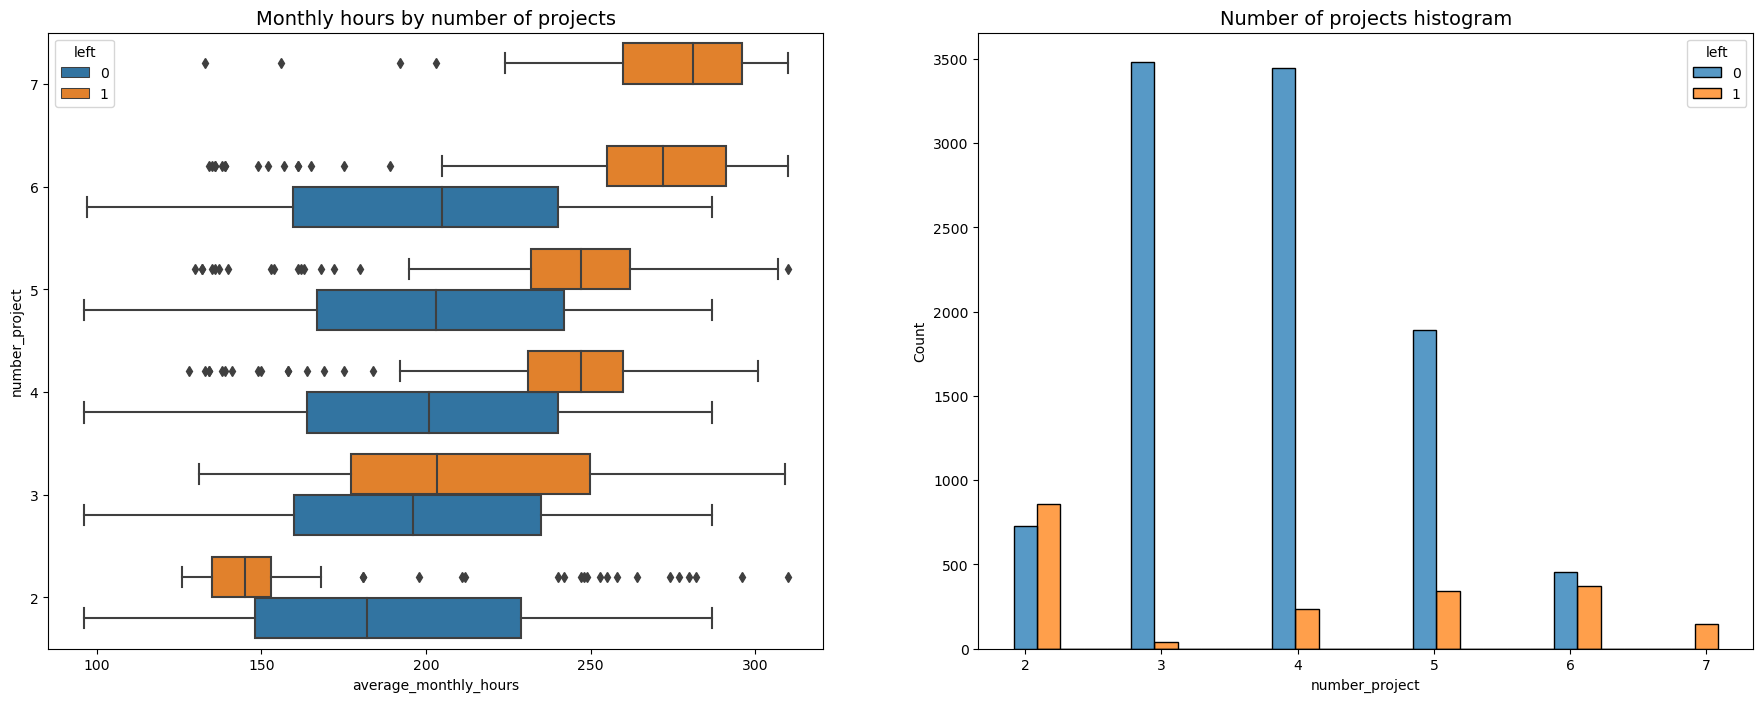

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot `average_monthly_hours` for `number_project
# comparing left vs. stayed
sns.boxplot(data=df1,
            x="average_monthly_hours",
            y="number_project",
            hue="left",
            orient="h",
           ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize="14")

# Histogram of number of projects distribution
# comparing left vs. stayed
tenure_stay = df1[df1["left"]==0]["number_project"]
tenure_left = df1[df1["left"]==1]["number_project"]
sns.histplot(data=df1,
             x="number_project",
             hue="left",
             multiple="dodge",
             shrink=2,
             ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize="14")

plt.show()

Assume a  work week of 40 hour a week and two weeks vacation per year.
The average number of wokring hours per month per employees working Monday-Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`

It seems that employees here are overworked.

There are two groups of employees who left the company: (A) those who worked less hours and in fewer projects and (B) those who worked more hours and in more projects.

Group A employees were assigned 2 projects and it may be due to the fact that they most probably were let go.
On the other hand Group B employees that were assigned 7 projects all left.

Employees who worked on 3 or 4 projects seem to have the best retention.

In [187]:
# Get value counts of stayed/left for employees with  projects
df1[df1["number_project"]==7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

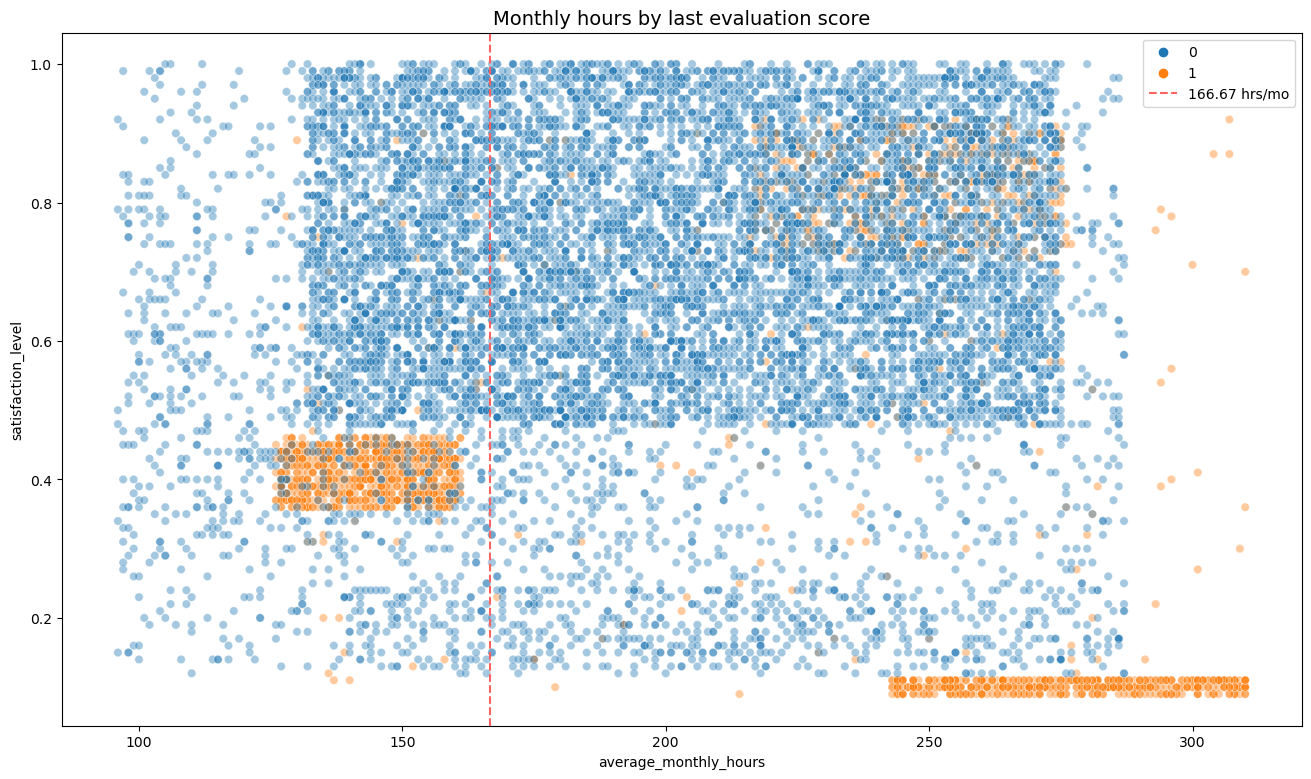

In [188]:
# Scatterplot of `average_monthly_hours` vs. `satisfaction_level
# comparing left vs. stayed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,
                x="average_monthly_hours",
                y="satisfaction_level",
                hue="left",
                alpha=0.4)
plt.axvline(x=166.67,
            color="#ff6361",
            label="166.67 hrs/mo",
            ls="--")
plt.legend()
plt.title("Monthly hours by last evaluation score", fontsize="14");

There is a sizeble group of employees that left, who worked ~240-315 hours per month and with their satisfaction level being close to zero.

Another sizeable group of employees that left, worked ~130-160 hours per month with a satisfaction level around 0.4.

The last group of employees that left worked ~210-280 hours per week with their satisfaction level ranging ~0.7-0.9.

(The strange shape of the distributions is indicatice of data manipulation or synthetic data.)

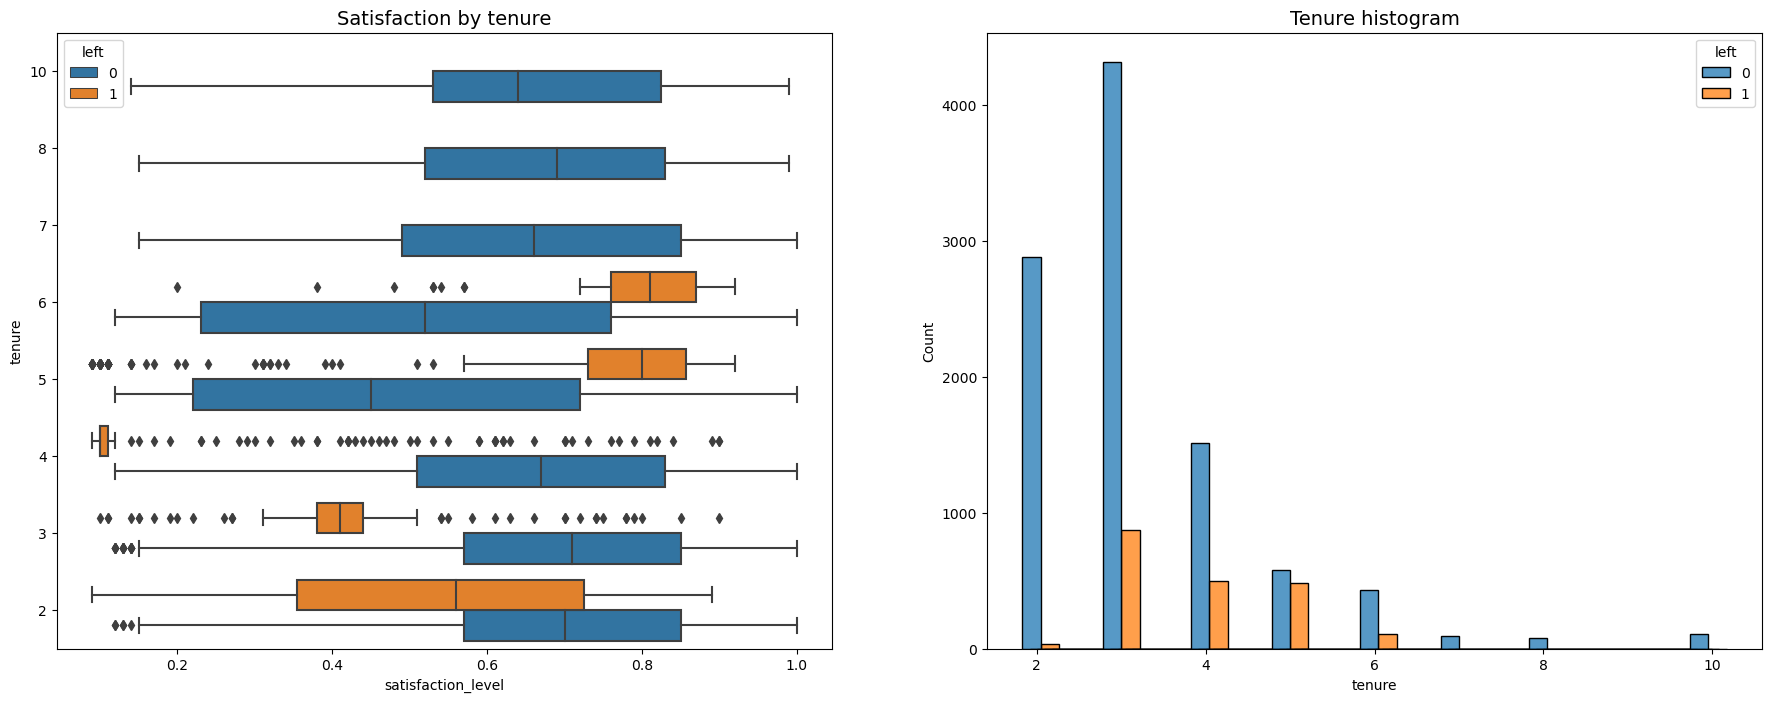

In [189]:
# Visualize satisfaction levels by tenure

fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot of distributions of `satisfaction_level` by `tenure`, employees stayed vs. left
sns.boxplot(data=df1,
            x="satisfaction_level",
            y="tenure",
            hue="left",
            orient="h",
            ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Satisfaction by tenure", fontsize="14")

# Histogram of distribution of `tenure`, employees stayed vs. left
tenure_stay = df1[df1["left"]==0]["tenure"]
tenure_left = df1[df1["left"]==1]["tenure"]
sns.histplot(data=df1,
             x="tenure",
             hue="left",
             multiple="dodge",
             shrink=5,
             ax=ax[1])
ax[1].set_title("Tenure histogram", fontsize="14")

plt.show();

Most of the employees work from 2 to 4 years, while few of the employees work for more than 6 years.

For the employees who left, satisfaction levels drop significantly up to 4 years, while after 5 years satisfaction levels are quite high.

For the employees who stayed, satisfaction levels show a slight decrease uo tp 5 years and then they rise again.

In [190]:
# Calculate mean and median satisfaction scores of employees (stayed and left)
df1.groupby(["left"])["satisfaction_level"].agg([np.mean, np.median])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

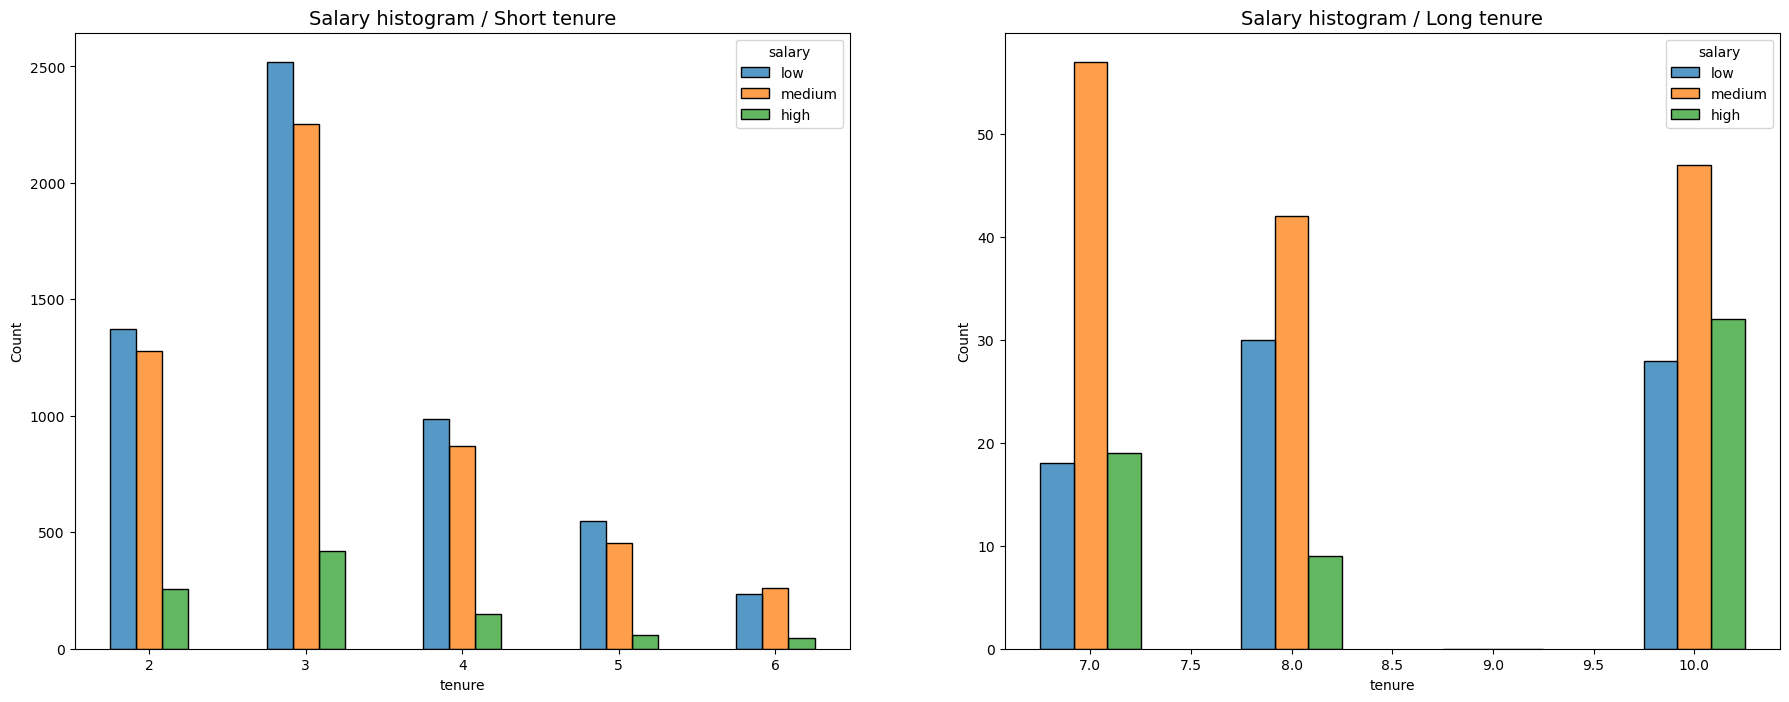

In [191]:
# Examine salary levels for different tenures

fig, ax = plt.subplots(1, 2, figsize = (22,8))

tenure_short = df1[df1["tenure"] < 7]
tenure_long = df1[df1["tenure"] > 6]

# Short tenure histogram
sns.histplot(data=tenure_short,
             x="tenure",
             hue="salary",
             discrete=1,
             hue_order=["low", "medium", "high"],
             multiple="dodge",
             shrink=0.5,
             ax=ax[0])
ax[0].set_title("Salary histogram / Short tenure", fontsize="14")

# Long tenure histogram
sns.histplot(data=tenure_long,
             x="tenure",
             hue="salary",
             discrete=1,
             hue_order=["low", "medium", "high"],
             multiple="dodge",
             shrink=0.5,
             ax=ax[1])
ax[1].set_title("Salary histogram / Long tenure", fontsize="14")

plt.show();

There are no disproportionately higher-paid long-tenured employees

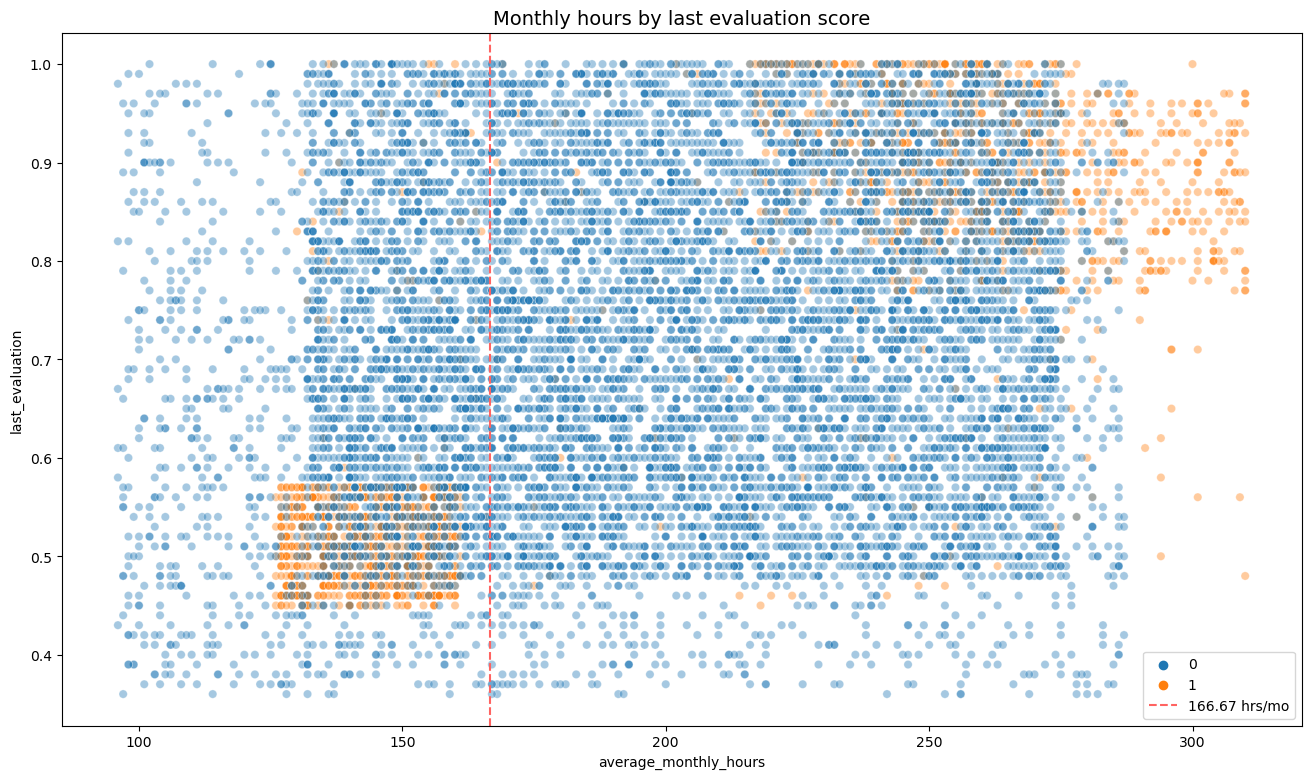

In [192]:
# Scatterplot of `average_monthly_hours` vs. `last_evaluation`
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,
                x="average_monthly_hours",
                y="last_evaluation",
                hue="left",
                alpha=0.4)
plt.axvline(x=166.67,
            color="#ff6361",
            label="166.67 hrs/mo",
            ls="--")
plt.legend() #labels=["166.67 hrs/mo", "left", "stayed"]
plt.title("Monthly hours by last evaluation score", fontsize="14");

Two groups of employees who left:
- Long working hours / High evaluation scores
- Short working hours / Low evaluation scores

Working long hours doesn't mean a higher evaluation score.

Most of the employees work well over 167 hours per month.

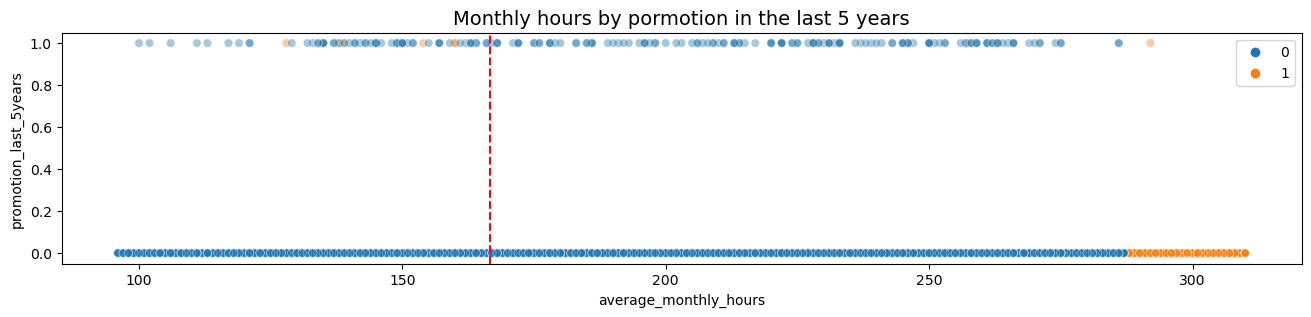

In [193]:
# Examine relationship between `average_monthly_hours` and `promotion_last_5years`

plt.figure(figsize=(16,3))
sns.scatterplot(data=df1,
                x="average_monthly_hours",
                y="promotion_last_5years",
                hue="left",
                alpha=0.4)
plt.axvline(x=166.67,
            color="red",
            ls="--")
plt.legend() #labels=["166.67", "left", "stayed"]
plt.title("Monthly hours by pormotion in the last 5 years", fontsize="14");

The majority of the employees who left, worked the most hours and were not promoted in the last 5 years.

In [194]:
# Employees at each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

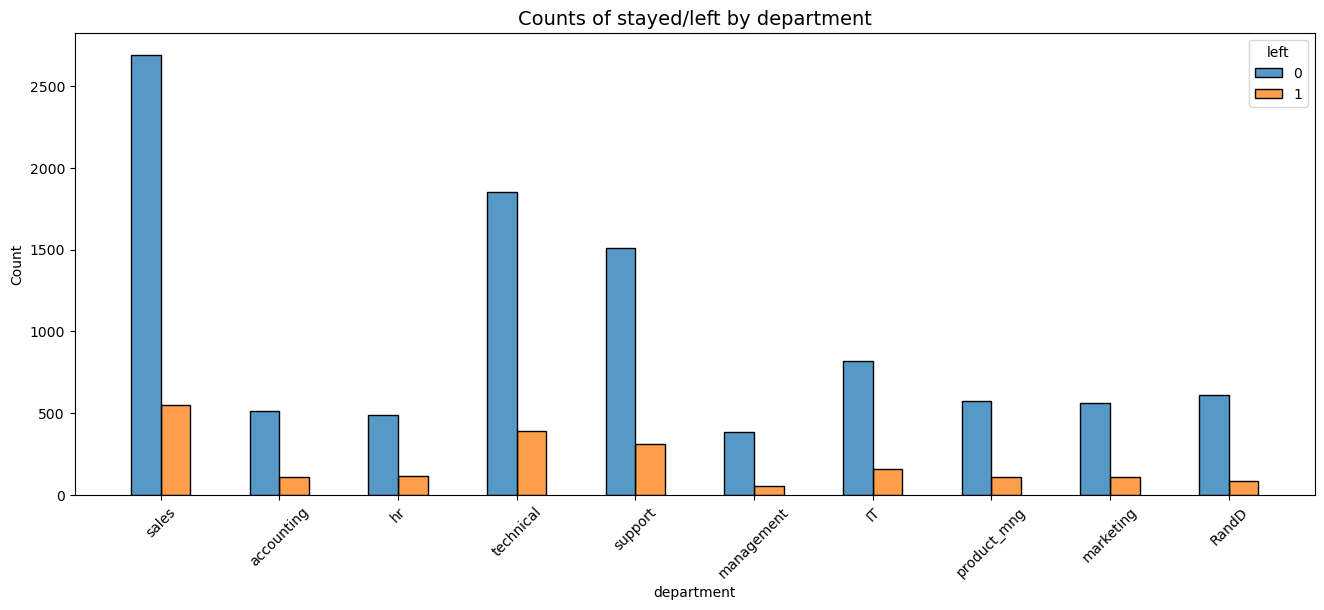

In [195]:
# Department distribution of employees / stayed vs. left
plt.figure(figsize=(16,6))
sns.histplot(data=df1,
             x="department",
             hue="left",
             discrete=1,
             hue_order=[0,1],
             multiple="dodge",
             shrink=0.5)
plt.xticks(rotation=45)
plt.title("Counts of stayed/left by department", fontsize=14);

No department seems to differ significanlty i its proportion of employees who left to those who stayed

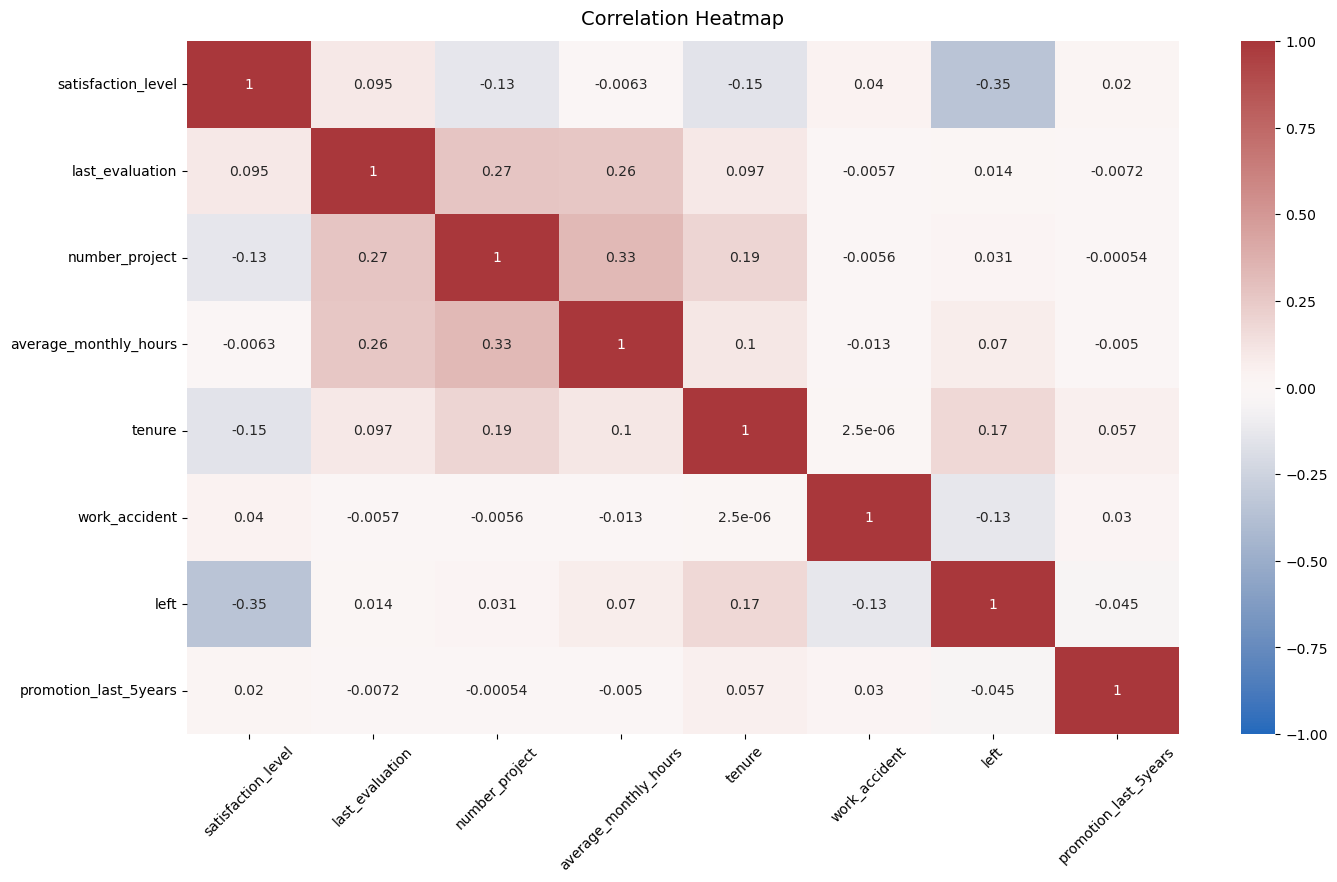

In [196]:
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df1.corr(numeric_only=True),
                      vmin=-1,
                      vmax=1,
                      annot=True,
                      cmap=sns.color_palette("vlag", as_cmap=True))
plt.xticks(rotation=45)
heatmap.set_title("Correlation Heatmap",
                  fontdict={"fontsize":14}, pad=12);

There is some positive correlation between number of projects, monthly hours and evaluation scores, and some negative correlation between employee leaves and satisfaction levels.

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

### Identify the type of prediction task and the types of models most appropriate for this task

The goal is to predict whether an employee leaves the company.

The outcome variable `left` can be either 1 (left) or 0 (stayed) which makes it a categorical outcome variable.

There are two types of models appropriate for this prediction task: 
- Logistic Regression model
- Tree-based Machine Learning model


### Build a Tree-based model 

**Implementation of Decision Tree and Random Forest**

Before splitting the data, non-numeric variables must be encoded.

`department` will be dummied and `salary` because it's ordinal its levels will be converted to numbers (0-2).

In [197]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc["salary"] = (df_enc["salary"].astype("category")
                    .cat.set_categories(["low", "medium", "high"])
                    .cat.codes)

# Dummny encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False, dtype=int)

# Display the new datarame
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [198]:
# Isolate the outcome variable
y = df_enc["left"]

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [199]:
# Select the features
X = df_enc.drop("left", axis=1)

X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [200]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

**Decision Tree - Round 1**

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best models parameters.

In [201]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [4, 6, 8, None],
             "min_samples_leaf": [2, 5, 1],
             "min_samples_split": [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy": "accuracy", 
           "precision": "precision", 
           "recall": "recall", 
           "f1": "f1", 
           "roc_auc": "roc_auc"}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [202]:
%%time

# Fit the decision tree model to the training data
tree1.fit(X_train, y_train)

CPU times: user 3.81 s, sys: 104 ms, total: 3.92 s
Wall time: 4.24 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [203]:
# Identify the optimal values for the decision tree parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [204]:
# Identify the best AUC score on CV
tree1.best_score_

0.969819392792457

This strong AUC score indicates that this model can predict employees who will leave very well.

In [205]:
# Write a funciton to extract scores from the grid search

def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
        
    Returns a pandas df with the F1, recall, precision, accuracy and AUC scores
    for the model with the best mean metric score across all validation folds.
    '''
    
    # Create dictionary that maps imput metric to actual metric name in GridSearchCV
    metric_dict = {"auc": "mean_test_roc_auc",
                   "precision": "mean_test_recall",
                   "f1": "mean_test_f1",
                   "accuracy": "mean_test_accuracy"}
    # Get all the results from the CV ad put them in a DF
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the DF with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract Accuracy, Precision, Recall, and F1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision],
                          "recall": [recall],
                          "F1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]})
    
    return table


In [206]:
# Use the function to get all CV scores
tree1_cv_results = make_results("decision tree cv", tree1, "auc")
tree1_cv_results

model  precision    recall        F1  accuracy       AUC
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All those scores from the Decision Tree model are strong indicators of good model performance.

But Decision Trees are vulnerable to overfitting. Random Forests avoid overfitting by incorporating multiple trees to make predictions.

It's a good idea to biuld a Random Forest model and set up cross-validated grid-search to search for the best model parameters.

**Random Forest - Round 1**

In [207]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [3, 5, None],
             "max_features": [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4],
             "n_estimators": [300, 500]}

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy": "accuracy", 
           "precision": "precision", 
           "recall": "recall", 
           "f1": "f1", 
           "roc_auc": "roc_auc"}

# Intantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [208]:
%%time

# Fit the random forest model to the training data
rf1.fit(X_train, y_train)

CPU times: user 19min 49s, sys: 8.63 s, total: 19min 58s
Wall time: 21min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [209]:
import os

notebook_path = os.getcwd()
print(notebook_path)

/Users/imac/Capstone project: Salifort Motors, providing data-driven suggestions for HR


In [210]:
path = '/Users/imac/Capstone project: Salifort Motors, providing data-driven suggestions for HR/'

In [211]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    
    with open(path + save_as + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

In [212]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
        
    return model

In [213]:
# Write pickle
write_pickle(path, rf1, "hr_rf1")

In [214]:
# Read pickle
rf1 = read_pickle(path, "hr_rf1")

In [215]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

In [216]:
# Check best parameters
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [217]:
# Get all CV scores
rf1_cv_results = make_results("random forest cv", rf1, "auc")
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       AUC
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       AUC
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the Random Forest model are better than thos of the Decision Tree model, with an exception of recall that is 0.001 lower.

This indicates that the Random Forest model outperforms the Decision Tree model.

In [218]:
# Define a function that gets all the scores from a model's predictions

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({"model": [model_name],
                          "precision": [precision],
                          "recall": [recall],
                          "f1": [f1],
                          "accuracy": [accuracy],
                          "AUC": [auc]})
    
    return table

In [219]:
# Get predicitons on test data
rf1_test_scores = get_scores("random forest1 test", rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

**Feature Engineering**

In order to improve the model and avoid data leakage from occuring the next round will incorporate feature engineering.

There is a possibility that the `satisfaciton_level` and `average_monthly_hours` columns are a source of data leakage because either the satisfaction levels reported are not correct or employees that decided to quit or have been informed to be fired may be working fewer hours.  

In [220]:
# Drop `satisfaction_level` 
df2 = df_enc.drop("satisfaction_level", axis=1)

df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [221]:
# Create `overworked` column. Begin with appending `average_monthly_hours` column values
df2["overworked"] = df2["average_monthly_hours"]

# Inspect max and min average monthly hours values
print("Max hours:", df2["overworked"].max())
print("Min hours:", df2["overworked"].min())

Max hours: 310
Min hours: 96


Previously we've calculated the average monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day at 166.67hrs/month.

We can define being overworked as working more than 175 hours per month on average.

In [222]:
# Define `overworked` as working > 175 hrs/week
df2["overworked"] = (df2["overworked"] > 175).astype(int)

df2["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [223]:
# Drop the `average_monthly_hours` column
df2 = df2.drop("average_monthly_hours", axis=1)

df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

In [224]:
# Isolate the outcome varaible
y = df2["left"]

# Select the features
X = df2.drop("left", axis=1)

In [225]:
# Create the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

**Decision Tree - Round 2**

In [226]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [4, 6, 8, None],
             "min_samples_leaf": [2, 5, 1],
             "min_samples_split": [2, 4, 6]}

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy": "accuracy", 
           "precision": "precision", 
           "recall": "recall", 
           "f1": "f1", 
           "roc_auc": "roc_auc"}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [227]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.28 s, sys: 102 ms, total: 3.39 s
Wall time: 3.71 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [228]:
# Check best parameters
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [229]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.


In [230]:
# Get all CV scores
tree2_cv_results = make_results("decision tree2 cv", tree2, "auc")
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       AUC
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       AUC
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

**Random Forest - Round 2**

In [231]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {"max_depth": [3, 5, None],
             "max_features": [1.0],
             "max_samples": [0.7, 1.0],
             "min_samples_leaf": [1, 2, 3],
             "min_samples_split": [2, 3, 4],
             "n_estimators": [300, 500]}

# Assign a dictionary of scoring metrics to capture
scoring = {"accuracy": "accuracy", 
           "precision": "precision", 
           "recall": "recall", 
           "f1": "f1", 
           "roc_auc": "roc_auc"}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit="roc_auc")

In [232]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 14min 40s, sys: 8.3 s, total: 14min 48s
Wall time: 15min 48s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [233]:
# Write pickle
write_pickle(path, rf2, "hr_rf2")

In [234]:
# Read pickle
rf2 = read_pickle(path, "hr_rf2")

In [235]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [236]:
# CHeck best AUC score on CV
rf2.best_score_

0.9648100662833985

In [237]:
# Get all CV scores
rf2_cv_results = make_results("random forest2 cv", rf2, "auc")
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       AUC
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      AUC
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

In [238]:
# Get predictions on test data
rf2_test_scores = get_scores("random forest2 test", rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

This seems to be a stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

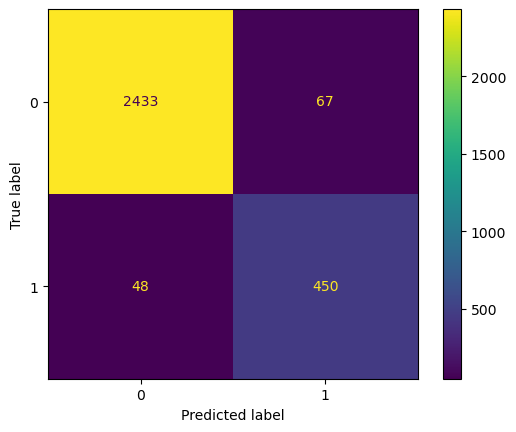

In [239]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(values_format='')

plt.show()

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

**Decision Tree Splits**

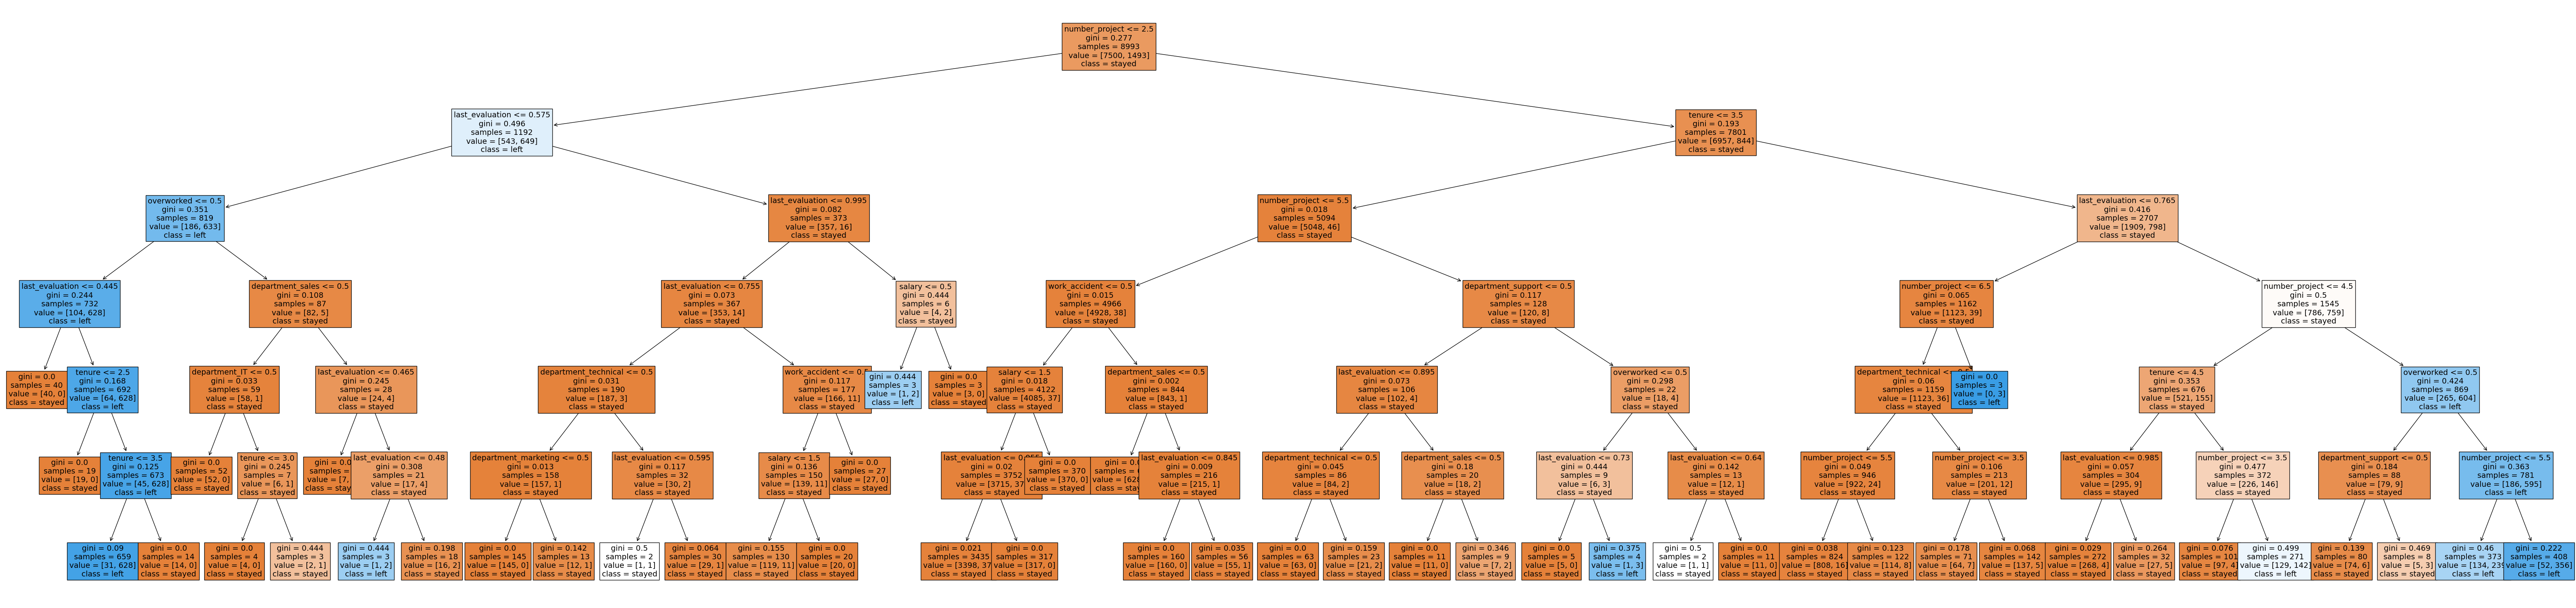

In [241]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_,
          max_depth=6,
          fontsize=14,
          feature_names=['last_evaluation', 'number_project', 'tenure', 'work_accident',
                         'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
                         'department_accounting', 'department_hr', 'department_management',
                         'department_marketing', 'department_product_mng', 'department_sales',
                         'department_support', 'department_technical', 'overworked'],
          class_names=["stayed", "left"],
          filled=True)
plt.show()

**Decision Tree feature importance**

In [242]:
# tree2 importances dataframe
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=["gini_importance"],
                                 index=X.columns)

tree2_importances = tree2_importances.sort_values(by="gini_importance", ascending=False)

# Extract features with importance > 0
tree2_importances = tree2_importances[tree2_importances["gini_importance"] != 0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

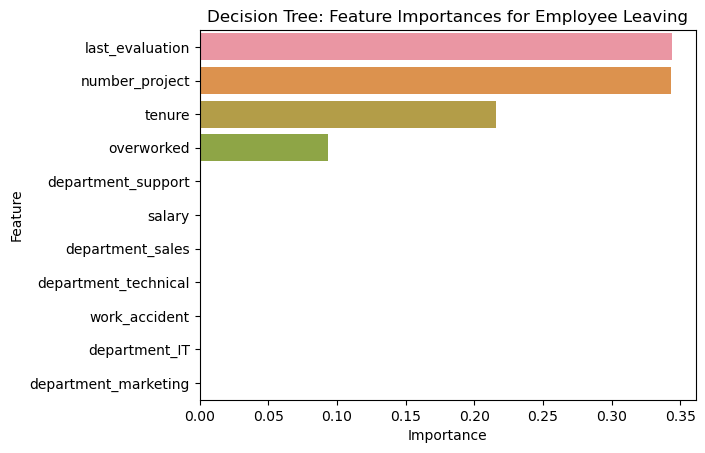

In [243]:
# Create barplot to visualize decision tree feature importances
sns.barplot(data=tree2_importances,
            x="gini_importance",
            y=tree2_importances.index,
            orient="h")
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

**Random Forest feature importance**

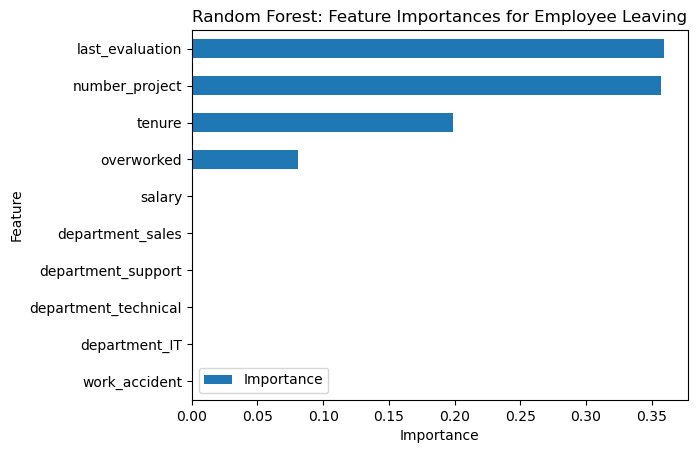

In [244]:
# Get feature impotances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat, "Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")

fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind="barh",
               ax=ax1,
               x="Feature",
               y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 
